In [152]:
# packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import os
import xarray as xr
from glob import glob

import netCDF4 as nc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from utils import * 


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
# create an array that includes data at selected single location:
# [date   SWE   temp   humd   airpress]

i = 95 # index for correct lat
j = 206 # index for correct lon
x = 312 # index for correct lat in SWE
y = 160 # index for correct lon in SWE

# open predictor data:
pres_path = '/Users/rosiekrasnoff/Desktop/SWE_final_project/predictor_data/ps_watch-wfdei_2001_2010.nc4'
hum_path = '/Users/rosiekrasnoff/Desktop/SWE_final_project/predictor_data/rhs_watch-wfdei_2001_2010.nc4'
temp_path = '/Users/rosiekrasnoff/Desktop/SWE_final_project/predictor_data/tas_watch-wfdei_2001_2010.nc4'

temp_ds = xr.open_dataset(temp_path) # temperature dataset
humd_ds = xr.open_dataset(hum_path)  # humidity dataset
pres_ds = xr.open_dataset(pres_path) # air pressure dataset

date = pd.DatetimeIndex(temp_ds.time)

#length = (len(temp_ds.time))
#print(length)

train_df = pd.DataFrame(columns=['date','SWE','temp','hum','pres'])
test_df = pd.DataFrame(columns=['date','SWE','temp','hum','pres'])

# loop through time in predictor files, t is time index, one SWE file (may) exist for every day 
for t in range((len(temp_ds.time))):
    
    # date into form yyyymmdd for name of SWE file
    dy = (date.year[t])
    dm = (date.month[t])
    dd = (date.day[t])
    t_date = dy*10000+dm*100+dd 
    str_date = str(t_date)
    
    
    if dm < 6 or dm > 8: # no snow in summer months
        #print(str_date)
        
        # open SWE data if it exists:
        filename = str_date + '_northern_hemisphere_swe_0.25grid.nc'
        swe_path = '/Users/rosiekrasnoff/Desktop/SWE_final_project/GlobSnow_data/' + filename
    
        try: #some SWE files don't exist, so try to open
            swe_ds = xr.open_dataset(swe_path) #swe dataset
            swe_numpy = swe_ds.swe.values #swe values in numpy array
            my_swe = swe_numpy[x,y]
            my_temp = temp_ds.tas[t,i,j].values.item()
            my_humd = humd_ds.hurs[t,i,j].values.item()
            my_pres = pres_ds.ps[t,i,j].values.item()
            #testing data is winter 04-05 or 07-08
            if (dm>8 and dy==2004) or (dm<6 and dy==2005) or (dm>8 and dy==2007) or (dm<6 and dy==2008):
                d = {'date':date[t],'SWE':my_swe,'temp':my_temp,'hum':my_humd,'pres':my_pres}
                test_df = test_df.append(d, ignore_index=True)
            else:               
                d = {'date':date[t],'SWE':my_swe,'temp':my_temp,'hum':my_humd,'pres':my_pres}
                train_df = train_df.append(d, ignore_index=True)
        except:
            pass

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(d, ignore_index=True)
/var/folders/vk/73wdxc_14wj23yn81gyq7zcr0000gn/T/ipykernel_13924/4109801797.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

In [154]:
# training data
train_df.head()

,date,SWE,temp,hum,pres
0,2001-01-01,0.0,263.546143,73.508492,96964.562500
1,2001-01-02,0.0,262.069763,76.259216,97539.937500
2,2001-01-03,0.0,264.118225,73.916405,97338.460938
3,2001-01-04,0.0,266.926605,69.559303,96404.531250
4,2001-01-05,0.0,266.665710,82.092102,95651.828125


In [155]:
# testing data
test_df.head()

,date,SWE,temp,hum,pres
0,2004-10-10,0.0,282.351868,81.613922,97047.539062
1,2004-10-11,0.0,279.714935,75.211906,97200.710938
2,2004-10-12,0.0,278.931732,75.257233,96695.828125
3,2004-10-13,0.0,281.113586,72.333908,95989.257812
4,2004-10-14,0.0,282.596436,80.060654,95469.359375


In [156]:
# Training data: extracting and converting to arrays

# predictant: SWE is y
y_train_df = train_df[['SWE']]
y_train = y_train_df.values.ravel()
##y_train = pd.DataFrame(y_train_df.to_pandas())

# predictors: temp, humidity, air pressure
X_train_df = train_df[['temp','hum','pres']]
#############train_data = train_data_df.values

# Testing data: extracting and converting to arrays
# predictant: SWE
y_test_df = test_df[['SWE']]
y_test = y_test_df.values.ravel()

# predictors: temp, humidity, air pressure
X_test_df = test_df[['temp','hum','pres']]
###test_data = test_data_df.values


#print(train_data)

In [157]:
print("Training set: {}".format(X_train_df.shape))  # 1660 days, 3 variables
print("Testing set:  {}".format(X_test_df.shape))   # 426 days, 3 variables

Training set: (1660, 3)
Testing set:  (426, 3)


### Data normalization

In [158]:
# Standardization
mean, std = X_train_df.mean(), X_train_df.std()# only use the mean and std of the training set

X_train_df   = (X_train_df - mean)/std
X_test_df    = (X_test_df - mean)/std

X_train = X_train_df.to_numpy()
y_train = y_train_df.to_numpy()
X_test = X_test_df.to_numpy()

print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(1660, 3) (1660, 1) (426, 3) (426,)


#### Reshape data to feed into the LSTM model

The LSTM needs data with the format of **[samples, time steps, features]**

Here the lag time step is set to **5**

In [159]:
X_length = len(X_train_df)

slider = 5
X_train_all = []
y_train_all = []
    
X_subset = np.array([X_train[i:i+slider] for i in range(0, X_length-slider+1)])
y_subset = np.array([[y_train[i+slider-1]] for i in range(0, X_length-slider+1)])
    
X_train_all.append(X_subset)
y_train_all.append(y_subset)
    
X_train = np.concatenate(X_train_all,axis=0)
y_train = np.concatenate(y_train_all,axis=0)

end = y_test_df.shape[0]

X_test  = np.array([X_test[i:i+slider] for i in range(0, end-slider+1)])
y_test  = np.array([[y_test[i+slider-1]] for i in range(0, end-slider+1)])

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1656, 5, 3) (1656, 1, 1) (422, 5, 3) (422, 1)


### 2. Define the LSTM structure

In [186]:
# set hyperparameters
n_neuron       = 300
activation     = 'relu'
num_epochs     = 50
learning_rate  = 0.01
minibatch_size = 64
model_num      = 1

In [187]:
lstm_model = Sequential()
lstm_model.add(LSTM(n_neuron,input_shape=(X_train.shape[1],X_train.shape[2]),
               return_sequences=True,activation=activation))
lstm_model.add(LSTM(n_neuron,return_sequences=False,
               activation=activation))
lstm_model.add(Dense(n_neuron,activation=activation))
lstm_model.add(Dense(y_train.shape[-1],activation='linear')) 

lstm_model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

lstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 5, 300)            364800    
                                                                 
 lstm_17 (LSTM)              (None, 300)               721200    
                                                                 
 dense_16 (Dense)            (None, 300)               90300     
                                                                 
 dense_17 (Dense)            (None, 1)                 301       
                                                                 
Total params: 1,176,601
Trainable params: 1,176,601
Non-trainable params: 0
_________________________________________________________________


### 3. Train the NN model

In [188]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = lstm_model.fit(X_train, y_train, 
                        batch_size = minibatch_size,
                        epochs = num_epochs,
                        validation_split=0.2, verbose=1,
                        callbacks=[early_stop],
                        shuffle=False)



Epoch 1/50
21/21 [==============================] - 2s 38ms/step - loss: 683.0746 - val_loss: 24.1073
Epoch 2/50
21/21 [==============================] - 1s 31ms/step - loss: 645.5256 - val_loss: 26.7366
Epoch 3/50
21/21 [==============================] - 1s 34ms/step - loss: 630.3901 - val_loss: 30.0803
Epoch 4/50
21/21 [==============================] - 1s 52ms/step - loss: 606.8411 - val_loss: 30.4922
Epoch 5/50
21/21 [==============================] - 1s 32ms/step - loss: 564.6252 - val_loss: 70.4579
Epoch 6/50
21/21 [==============================] - 1s 35ms/step - loss: 403.7800 - val_loss: 41.5630
Epoch 7/50
21/21 [==============================] - 1s 37ms/step - loss: 474.6654 - val_loss: 121.0490
Epoch 8/50
21/21 [==============================] - 1s 32ms/step - loss: 365.9676 - val_loss: 92.8207
Epoch 9/50
21/21 [==============================] - 1s 32ms/step - loss: 401.1721 - val_loss: 259.1966
Epoch 10/50
21/21 [==============================] - 1s 29ms/step - loss: 341.69

### 4. Evaluate the trained model

In [189]:
test_predictions = lstm_model.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
print(f'the mse is {mse}')
from sklearn.metrics import r2_score
r2 = r2_score(y_test,test_predictions)
print(f'the R^2 is {r2}')



14/14 [==============================] - 0s 6ms/step
the mse is 236.23473224848678
the R^2 is 0.22114844843061743


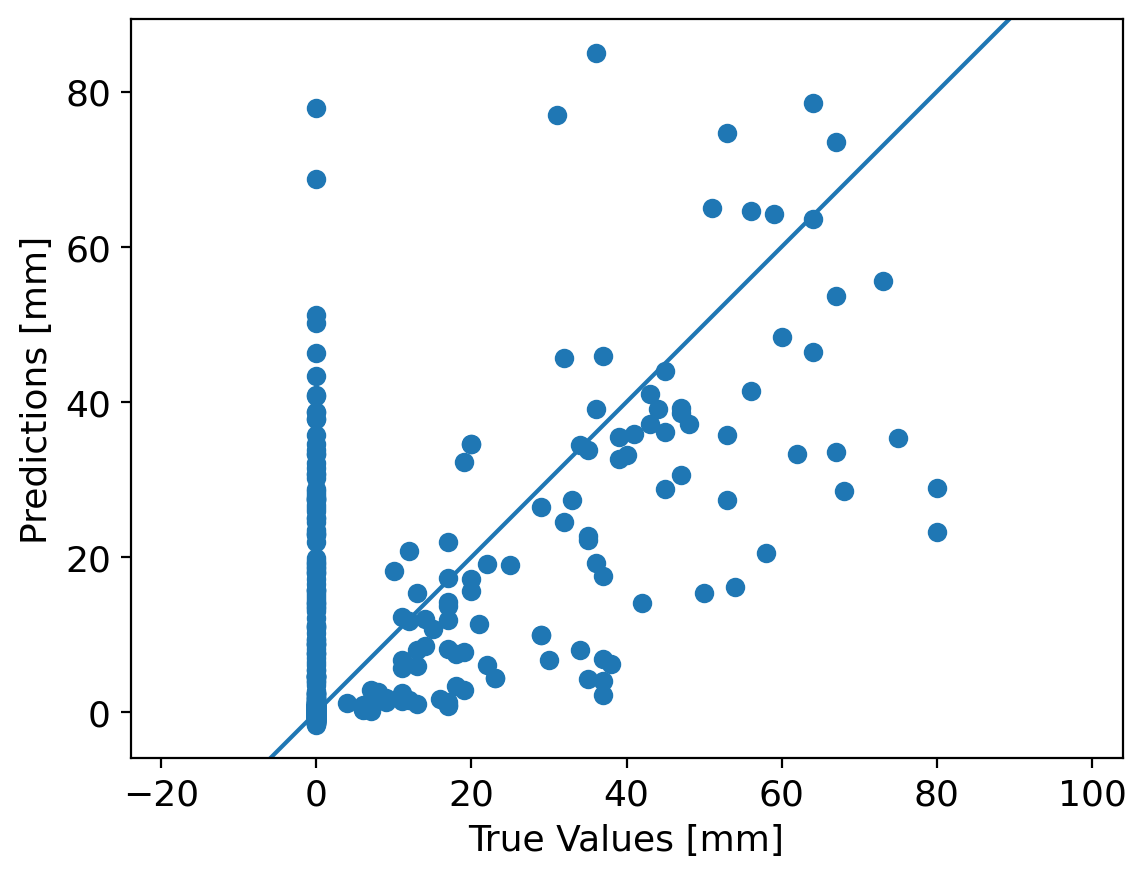

In [169]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [mm]')
plt.ylabel('Predictions [mm]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

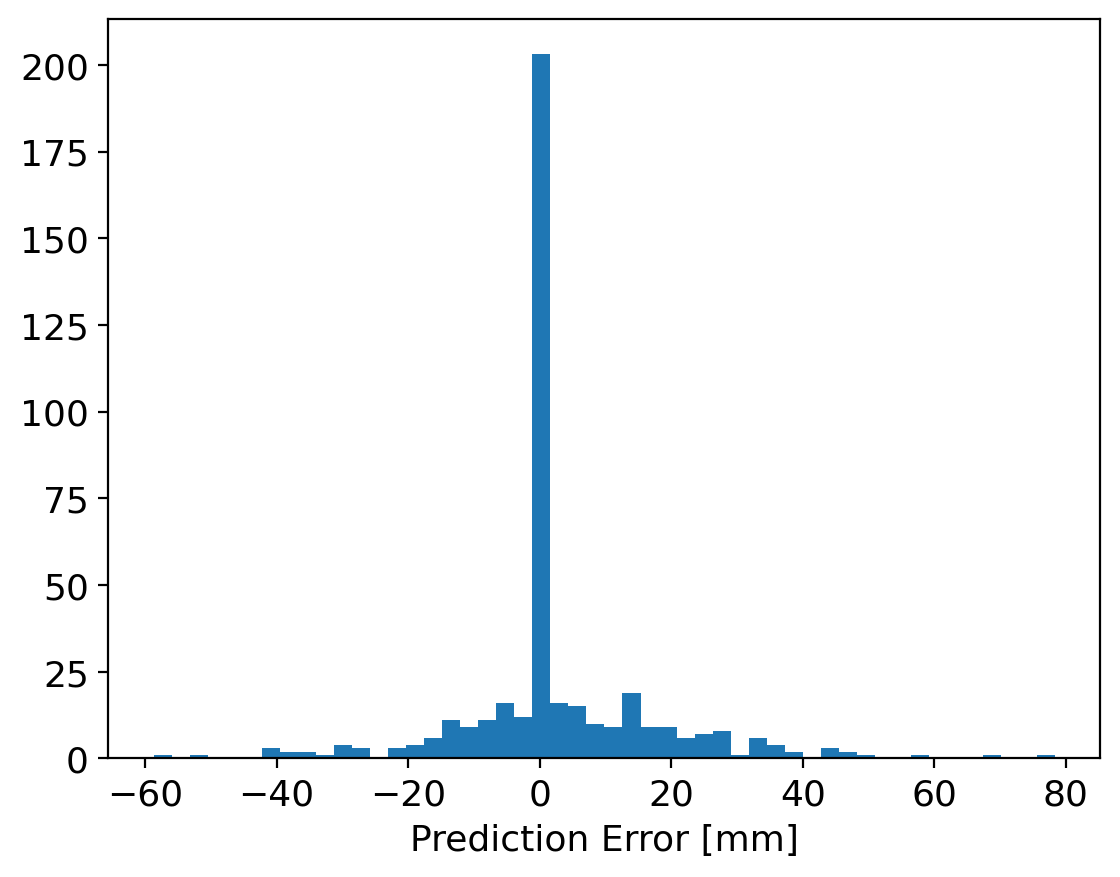

In [148]:
# histogram
error = test_predictions - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [mm]")
plt.show()

In [75]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()


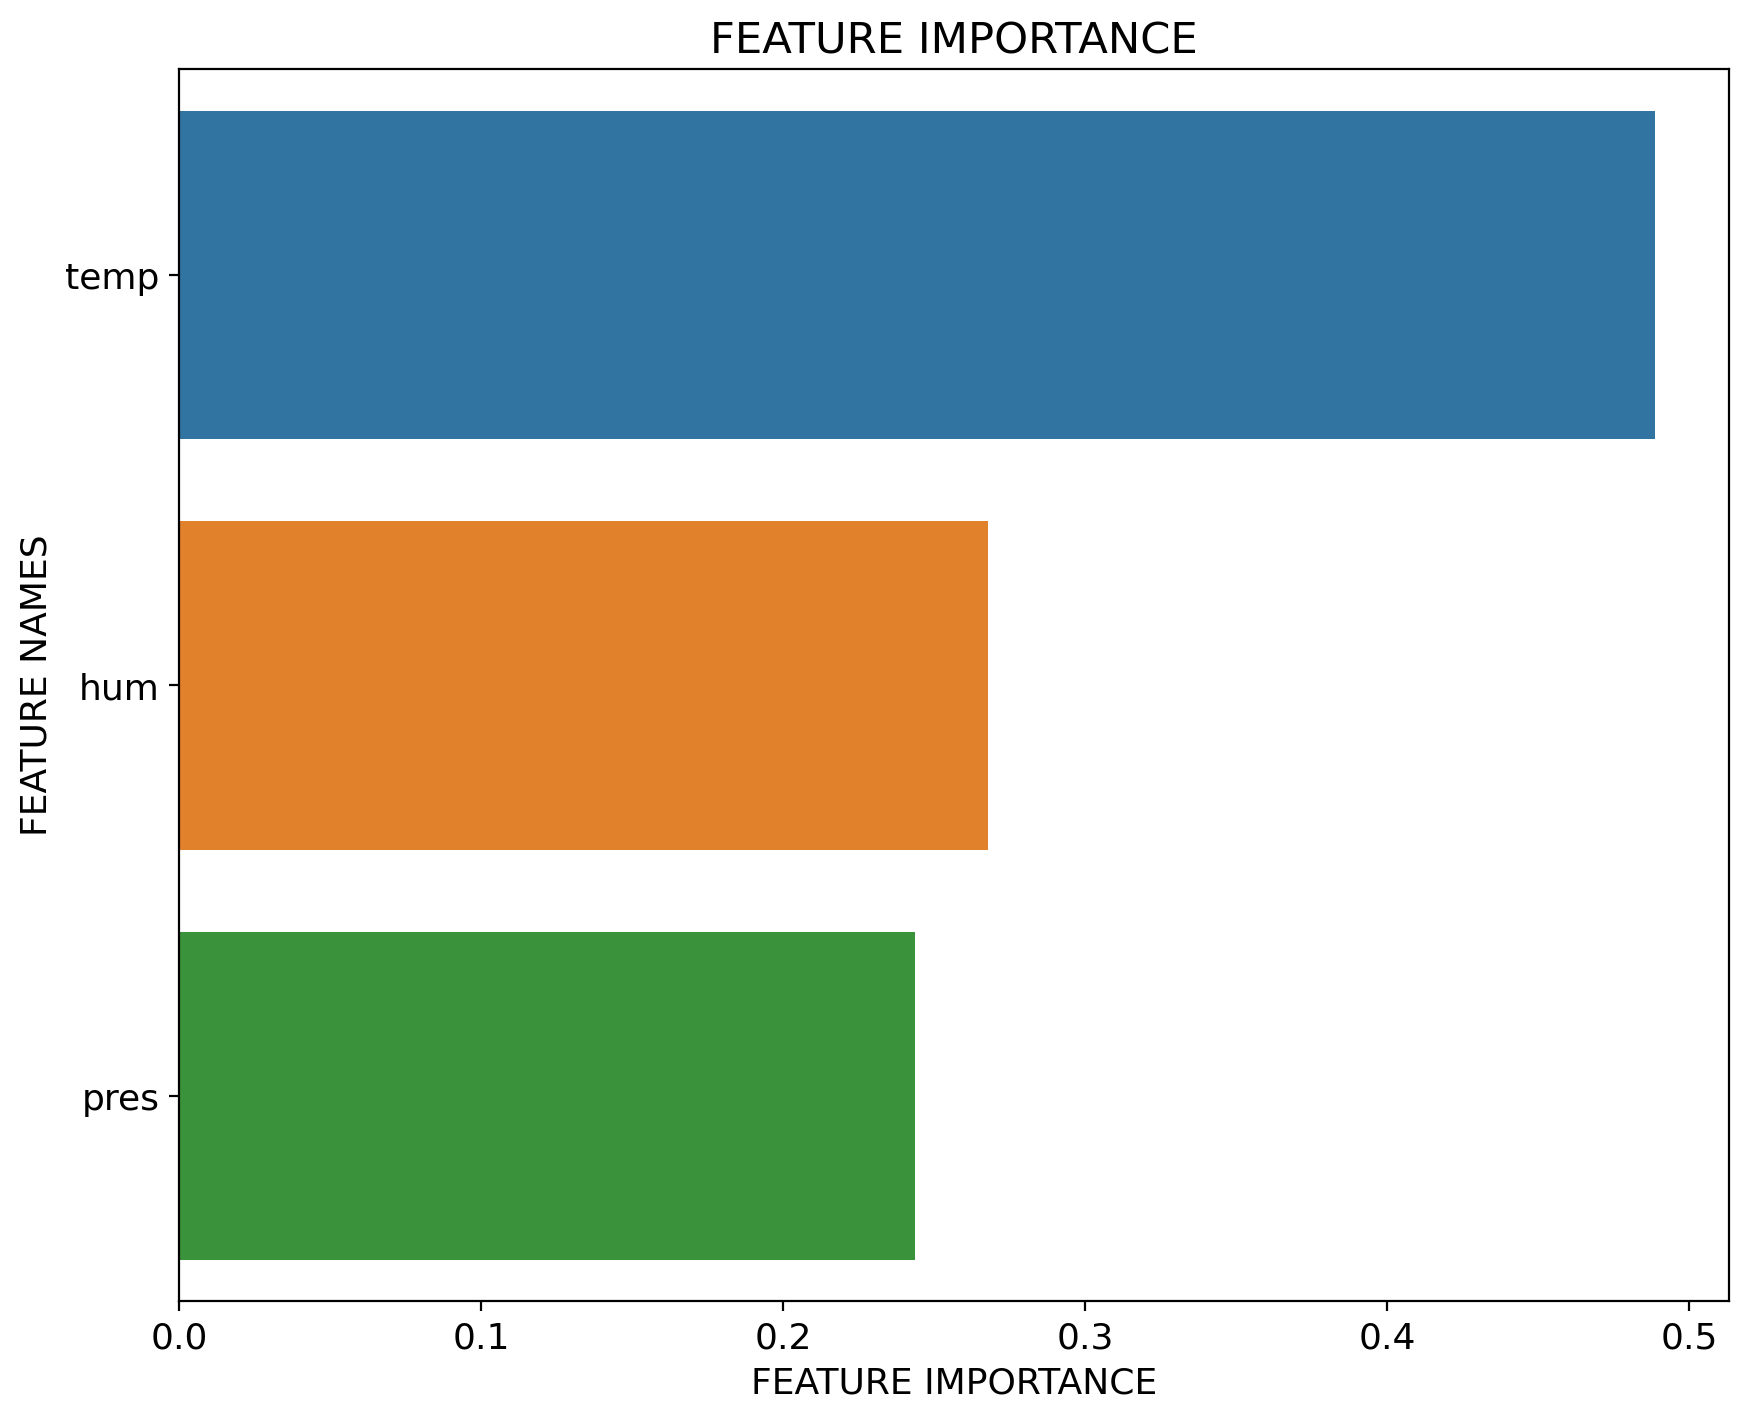

In [76]:
plot_feature_importance(model.feature_importances_, train_data_df.columns)